In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
sns.set_theme()
from utilities import *


In [2]:
#Load the configurations into dataframes

eil51 = pd.read_csv('configurations/eil51.tsp.txt', delimiter=' ', index_col= 0, header = None).T
eil51_opt = pd.read_csv('configurations/eil51.opt.tour.txt', delimiter=' ', index_col= False, header = None).T
a280 = pd.read_csv('configurations/a280.tsp.txt', delimiter=' ', index_col= 0, header = None).T
a280_opt = pd.read_csv('configurations/a280.opt.tour.txt', delimiter=' ', index_col= None, header = None).T
pcb442 = pd.read_csv('configurations/pcb442.tsp.txt', delimiter=' ', index_col= 0, header = None).T
pcb442_opt = pd.read_csv('configurations/pcb442.opt.tour.txt', delimiter=' ', index_col= None, header = None).T

In [3]:
#Create the graphs

G_eil51,pos_eil51= nodes_generator(eil51)
G_a280,pos_a280= nodes_generator(a280)
G_pcb442,pos_pcb442= nodes_generator(pcb442)

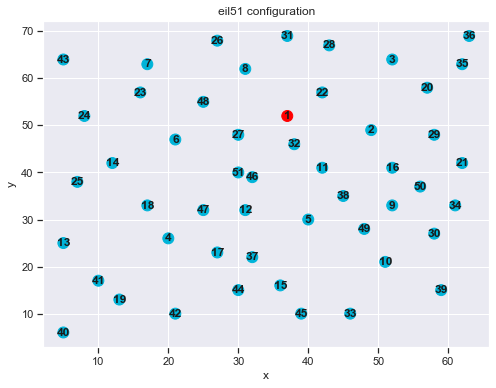

In [4]:
graph_plotter(G_eil51,pos_eil51,'eil51',8)

In [5]:
g = edges_generator(G_eil51,eil51_opt)

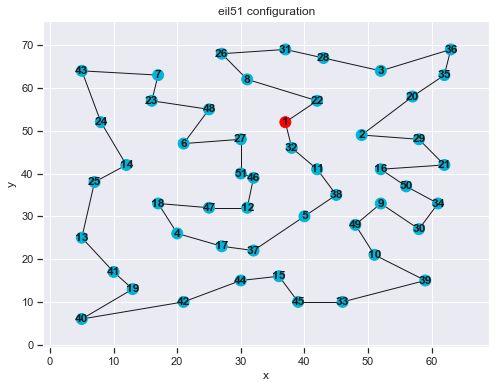

In [6]:
graph_plotter(g,pos_eil51,'eil51',8)


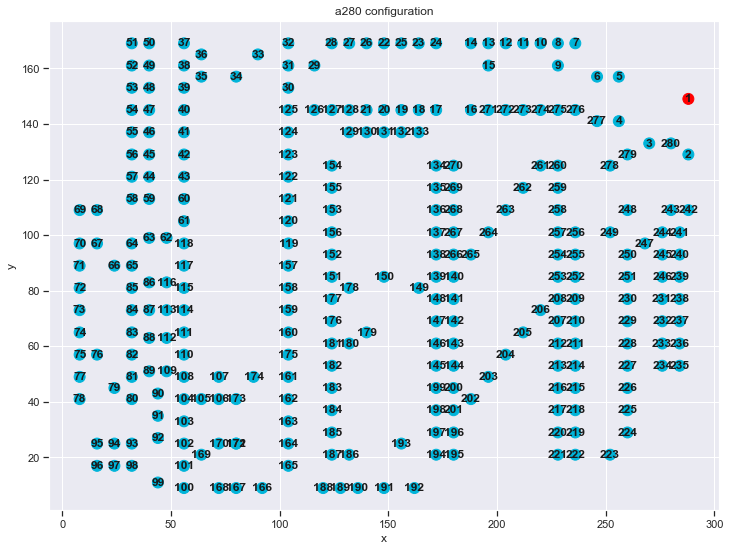

In [19]:
graph_plotter(G_a280,pos_a280,'a280',size=12)

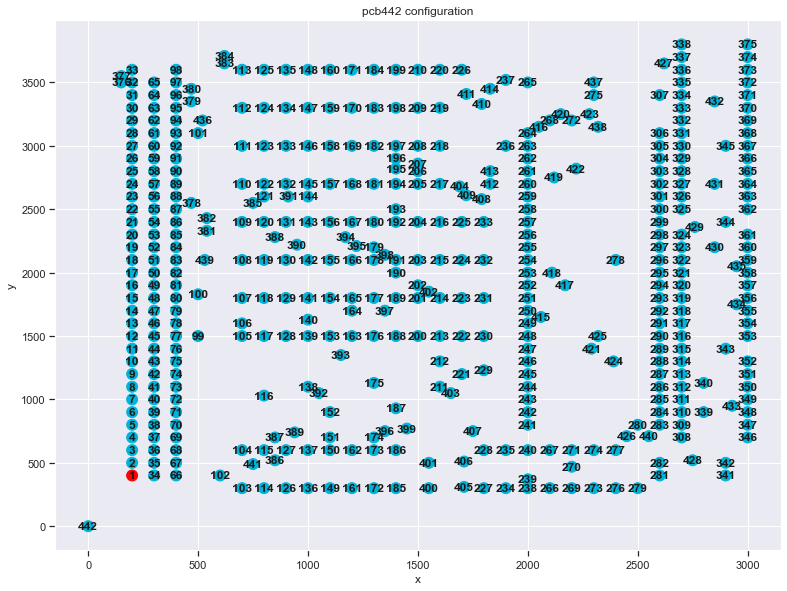

In [9]:
graph_plotter(G_pcb442,pos_pcb442,'pcb442',size=13)

In [4]:
#Distance matrix that finds the euclidean distance between each node

def distance_matrix(df):
    df = df.T
    dist = np.zeros((len(df),len(df)))
    x = df[1]
    y = df[2]
    for i in range(0,len(df[1])):
        diff_x = x -x[i+1]
        diff_y = y-y[i+1]

        length = np.asarray((diff_x**2 + diff_y**2)**0.5)
        dist[i]= length
    ddf = pd.DataFrame(data =dist)
    return ddf

def circuit(df,d_matrix):
#calculate the distance of a route
    tour =0
    cache = []
    temp = list(df.values)
    for i in range(0,len(df.T )-1):
        current = int(temp[i])
        next = int(temp[i+1])
        tour = d_matrix[current-1][next-1]
        cache.append(tour)
        sum = np.sum(cache)
    return sum


In [5]:
#Operator functions
def inverse(df,i,j):
#two opt
    temp = df.copy()
    j_n = j
    i_n = i
    while i<=j_n:
        col_list = list(df) 
        temp_list = list(temp)
        col_list[i-1], col_list[j-1] = temp_list[j-1], temp_list[i-1]
        df=df.reindex(columns=col_list)  
        i +=1
        j -=1
    return df
    

def insert(df,i,j):
    col_list = list(df) 
    col_list.remove(j)
    col_list.insert(i-1,j)
    df=df.reindex(columns=col_list)  
    return df

def swap(df,i,j):
    col_list = list(df) 
    col_list[i-1], col_list[j-1] = col_list[j-1], col_list[i-1]   
    df=df.reindex(columns=col_list)  
    return df



In [6]:
def new_sol(df,distance):
    d = list(df.columns)
    d.append(1)
    tour = pd.DataFrame(d)[0]
    f_x = circuit(tour,distance)
    return f_x

def accept_prob(df,distance,t):
    temp = df.copy()
    temp = inverse(temp,5,9)
    f_x = new_sol(df,distance)
    f_y = new_sol(temp,distance)
    if f_y <= f_x:
        return 1
    else:
        return np.exp(-(f_y-f_x)/t)



In [10]:
d_51 = distance_matrix(eil51)
d_280 = distance_matrix(a280)
d_pcb442 = distance_matrix(pcb442)
#sns.heatmap(d_51, annot=False)
#plt.show()
#opt_tour_51 = circuit(eil51_opt,d_51)
#opt_tour_280 = circuit(a280_opt,d_280)
#opt_tour_442 = circuit(pcb442_opt,d_pcb442)


In [12]:
accept_prob(eil51,d_51,50)

0.7477896706089769